## Data Visualisation project
#### This is a data visualisation project on the ages of members on nairaland.com on any given day.

In [1]:
#importing the needed libraries
import re 
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#scrapping the data
url = 'http://www.nairaland.com/home#featured'
raw_data = requests.get(url)
useful_data = raw_data.content

In [3]:
#turning html in useful_data into xml using BeautifulSoup
useful_data_xml = bs(useful_data, 'lxml')

#reading the text only without tags
for data in useful_data_xml("td"):
    print(data.text)

 Welcome, Guest: Join Nairaland / LOGIN! / Trending / Recent / NewStats: 2,405,464 members, 5,384,481 topics. Date: Friday, 24 January 2020 at 09:42 AM 
 
Nairaland / General: Politics, Crime, Romance, Jobs/Vacancies, Career, Business, Investment, NYSC, Education, Autos, Car Talk, Properties, Health, Travel, Family, Culture, Religion, Food, Diaries, Nairaland Ads, Pets, Agriculture
Entertainment: Jokes Etc, TV/Movies, Music/Radio, Celebrities, Fashion, Events, Sports, Gaming, Forum Games, Literature
Science/Technology: Programming, Webmasters, Computers, Phones, Art, Graphics & Video, Technology Market
 Latest News / Twitter  / Facebook  / How To Advertise 
 » Islamic Ruling On Family Planning «» Can The Imam Stand Higher Than Those Behind Him For Prayer? «» Supreme Court On Imo: INEC Failed To Tender Results It Claimed Were Genuine «» Naomi Osaka Vs 'Coco' Gauff At Australian Open 2020 (Live) «» Facebook Shuts Down Nnamdi Kanu’s Page. IPOB Reacts «» Lagos Commends LSPWC On Zero Tolera

In [4]:
#using the 're' module, to extract only the relevant birthday list and ignoring members whose DOB is not available
member_found = None
re_match = "[\w]+\([\d]+\)"
for data in useful_data_xml("td"):
    data_found = re.findall(re_match, data.text)
    if data_found:
        member_found = data_found
print(member_found)

['ucheuche1(40)', 'femiy2k(48)', 'adetola44(30)', 'asco15(29)', 'temodent(48)', 'darhood(31)', 'FKMagazine(32)', 'Ifeminikan1(33)', '2galante(40)', 'mrmaterial(40)', 'fendorf(37)', 'Wittywizard(31)', 'ceda99(26)', 'gidos91(29)', 'clive2u(28)', 'jahlove4jah(35)', 'shigoslim(31)', 'highman10(35)', 'victor75(28)', 'alopo4real(31)', 'anikemoses(30)', 'bammydele1(24)', 'markusadeleke(25)', 'hapiness44(30)', 'Shammak(26)', 'collins6381(25)', 'OYOGREAT(45)', 'HYENACHIEF(30)', 'adefitim(28)', 'martinez101(22)', 'enifex(26)', 'dhantey324(30)', 'Xtanley4(29)', 'meajobaby(26)', 'marychommy(34)', 'odytrixx(32)', 'krishfwesh(22)', 'JustJosh20(23)', 'OVA200(24)', 'Blissfulend(34)', 'dickson2000(29)', 'AkeemTy(29)', 'uchelsea(31)', 'nanadeeva01(22)', 'Cas49(29)', 'francezB(28)', 'piusnice(31)', 'Emmasteev(31)', '4wardnaija(23)', 'ubasinagod(38)', 'Jobesi(23)', 'Phreshmann12(21)', 'Dilfgem(22)', 'nerus419(31)', 'Danlily24(22)', 'superlanny(36)', 'Pericious(20)', 'idholo96(25)', 'Ibrah33m(23)', 'kidxbo

In [5]:
#further cleaning
for a in member_found:
    member_replaced = [a.replace(")", "")]
    for b in member_replaced:
        member_cleaned = b.split('(')
    print(member_cleaned)

['ucheuche1', '40']
['femiy2k', '48']
['adetola44', '30']
['asco15', '29']
['temodent', '48']
['darhood', '31']
['FKMagazine', '32']
['Ifeminikan1', '33']
['2galante', '40']
['mrmaterial', '40']
['fendorf', '37']
['Wittywizard', '31']
['ceda99', '26']
['gidos91', '29']
['clive2u', '28']
['jahlove4jah', '35']
['shigoslim', '31']
['highman10', '35']
['victor75', '28']
['alopo4real', '31']
['anikemoses', '30']
['bammydele1', '24']
['markusadeleke', '25']
['hapiness44', '30']
['Shammak', '26']
['collins6381', '25']
['OYOGREAT', '45']
['HYENACHIEF', '30']
['adefitim', '28']
['martinez101', '22']
['enifex', '26']
['dhantey324', '30']
['Xtanley4', '29']
['meajobaby', '26']
['marychommy', '34']
['odytrixx', '32']
['krishfwesh', '22']
['JustJosh20', '23']
['OVA200', '24']
['Blissfulend', '34']
['dickson2000', '29']
['AkeemTy', '29']
['uchelsea', '31']
['nanadeeva01', '22']
['Cas49', '29']
['francezB', '28']
['piusnice', '31']
['Emmasteev', '31']
['4wardnaija', '23']
['ubasinagod', '38']
['Jobes

In [6]:
#combining the list to a dictionary
members_list = {}

for a in member_found:
    member_replaced = [a.replace(")", "")]
    for b in member_replaced:
        member_cleaned =b.split('(')
        members_list[member_cleaned[0]] = int(member_cleaned[1])
        
print(members_list)

{'ucheuche1': 40, 'femiy2k': 48, 'adetola44': 30, 'asco15': 29, 'temodent': 48, 'darhood': 31, 'FKMagazine': 32, 'Ifeminikan1': 33, '2galante': 40, 'mrmaterial': 40, 'fendorf': 37, 'Wittywizard': 31, 'ceda99': 26, 'gidos91': 29, 'clive2u': 28, 'jahlove4jah': 35, 'shigoslim': 31, 'highman10': 35, 'victor75': 28, 'alopo4real': 31, 'anikemoses': 30, 'bammydele1': 24, 'markusadeleke': 25, 'hapiness44': 30, 'Shammak': 26, 'collins6381': 25, 'OYOGREAT': 45, 'HYENACHIEF': 30, 'adefitim': 28, 'martinez101': 22, 'enifex': 26, 'dhantey324': 30, 'Xtanley4': 29, 'meajobaby': 26, 'marychommy': 34, 'odytrixx': 32, 'krishfwesh': 22, 'JustJosh20': 23, 'OVA200': 24, 'Blissfulend': 34, 'dickson2000': 29, 'AkeemTy': 29, 'uchelsea': 31, 'nanadeeva01': 22, 'Cas49': 29, 'francezB': 28, 'piusnice': 31, 'Emmasteev': 31, '4wardnaija': 23, 'ubasinagod': 38, 'Jobesi': 23, 'Phreshmann12': 21, 'Dilfgem': 22, 'nerus419': 31, 'Danlily24': 22, 'superlanny': 36, 'Pericious': 20, 'idholo96': 25, 'Ibrah33m': 23, 'kidxbo

In [7]:
#converting the dictionary to a pandas dataframe
table = pd.DataFrame(list(members_list.items()), columns=["Username", "Age"])

#adding the present date as an extra column
todays_date = datetime.now().date()
table["Date"] = todays_date
#to save the scrapped data in csv format remove the comment on the line below
#table.to_csv('table.csv')
print(table)

       Username  Age        Date
0     ucheuche1   40  2020-01-24
1       femiy2k   48  2020-01-24
2     adetola44   30  2020-01-24
3        asco15   29  2020-01-24
4      temodent   48  2020-01-24
..          ...  ...         ...
93     pedroben   31  2020-01-24
94       Raveen   26  2020-01-24
95   Tonyfj2020   32  2020-01-24
96      Gobas22   20  2020-01-24
97  UsmanPeeper   17  2020-01-24

[98 rows x 3 columns]


In [8]:
#viewing the statistical summary of the table
print(table.describe())

             Age
count  98.000000
mean   28.530612
std     6.290566
min    17.000000
25%    24.000000
50%    28.000000
75%    31.000000
max    48.000000


In [9]:
#showing the frequency of each occuring age
table = table.join(table['Age'].value_counts(), how='right', rsuffix=" Frequency", sort=False)
print(table)

         Username  Age        Date  Age Frequency
30         enifex   26  2020-01-24              9
31     dhantey324   30  2020-01-24              9
26       OYOGREAT   45  2020-01-24              8
28       adefitim   28  2020-01-24              7
22  markusadeleke   25  2020-01-24              7
29    martinez101   22  2020-01-24              7
23     hapiness44   30  2020-01-24              6
25    collins6381   25  2020-01-24              6
20     anikemoses   30  2020-01-24              5
32       Xtanley4   29  2020-01-24              5
40    dickson2000   29  2020-01-24              4
21     bammydele1   24  2020-01-24              4
24        Shammak   26  2020-01-24              4
34     marychommy   34  2020-01-24              3
48     4wardnaija   23  2020-01-24              2
35       odytrixx   32  2020-01-24              2
37     JustJosh20   23  2020-01-24              2
27     HYENACHIEF   30  2020-01-24              1
45       francezB   28  2020-01-24              1


In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#a table of 20 oldest members
table_oldest20 = table.sort_values(by="Age", ascending=False)[:20]
print(table_oldest20)


#a table of 20 youngest members
table_youngest20 = table.sort_values(by="Age", ascending=True)[:20]
print(table_youngest20)

         Username  Age        Date  Age Frequency
26       OYOGREAT   45  2020-01-24              8
17      highman10   35  2020-01-24              1
34     marychommy   34  2020-01-24              3
35       odytrixx   32  2020-01-24              2
19     alopo4real   31  2020-01-24              1
23     hapiness44   30  2020-01-24              6
20     anikemoses   30  2020-01-24              5
31     dhantey324   30  2020-01-24              9
27     HYENACHIEF   30  2020-01-24              1
41        AkeemTy   29  2020-01-24              1
32       Xtanley4   29  2020-01-24              5
40    dickson2000   29  2020-01-24              4
28       adefitim   28  2020-01-24              7
45       francezB   28  2020-01-24              1
33      meajobaby   26  2020-01-24              1
30         enifex   26  2020-01-24              9
24        Shammak   26  2020-01-24              4
25    collins6381   25  2020-01-24              6
22  markusadeleke   25  2020-01-24              7


In [14]:
# age at 2005 when NairaLand was established
table["Age in 2005"] = table["Age"] - 15
print(table)


#How old will each celebrant be in 10 years?
table["Age in 10 years"] = table["Age"] + 10
print(table)

         Username  Age        Date  Age Frequency  Age in 2005
30         enifex   26  2020-01-24              9           11
31     dhantey324   30  2020-01-24              9           15
26       OYOGREAT   45  2020-01-24              8           30
28       adefitim   28  2020-01-24              7           13
22  markusadeleke   25  2020-01-24              7           10
29    martinez101   22  2020-01-24              7            7
23     hapiness44   30  2020-01-24              6           15
25    collins6381   25  2020-01-24              6           10
20     anikemoses   30  2020-01-24              5           15
32       Xtanley4   29  2020-01-24              5           14
40    dickson2000   29  2020-01-24              4           14
21     bammydele1   24  2020-01-24              4            9
24        Shammak   26  2020-01-24              4           11
34     marychommy   34  2020-01-24              3           19
48     4wardnaija   23  2020-01-24              2      

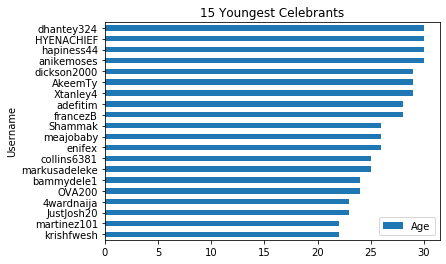

In [15]:
# To display the plot within the Jupyter notebook
get_ipython().run_line_magic('matplotlib', 'inline')

table_youngest20.plot(x="Username", y="Age", kind="barh", title="15 Youngest Celebrants")


In [16]:
# Lets find the sum of the ages
sum_youngest_20 = table_youngest20["Age"].sum()

# Lets find the percentage of each first 20 youngest members and save it in a new column "Percentage"
table_youngest20["Percentage"] = (table_youngest20["Age"] * 100) / (sum_youngest_20)
print(table_youngest20)

         Username  Age        Date  Age Frequency  Percentage
36     krishfwesh   22  2020-01-24              1    4.158790
29    martinez101   22  2020-01-24              7    4.158790
37     JustJosh20   23  2020-01-24              2    4.347826
48     4wardnaija   23  2020-01-24              2    4.347826
38         OVA200   24  2020-01-24              1    4.536862
21     bammydele1   24  2020-01-24              4    4.536862
22  markusadeleke   25  2020-01-24              7    4.725898
25    collins6381   25  2020-01-24              6    4.725898
30         enifex   26  2020-01-24              9    4.914934
33      meajobaby   26  2020-01-24              1    4.914934
24        Shammak   26  2020-01-24              4    4.914934
45       francezB   28  2020-01-24              1    5.293006
28       adefitim   28  2020-01-24              7    5.293006
32       Xtanley4   29  2020-01-24              5    5.482042
41        AkeemTy   29  2020-01-24              1    5.482042
40    di

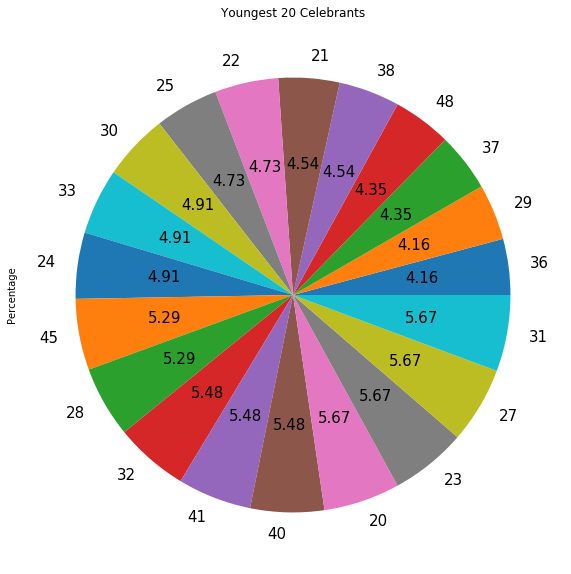

In [17]:
# to plot the pie chat of the Percentage column above
table_youngest20["Percentage"].plot.pie(autopct='%.2f', fontsize=15, figsize=(10, 10), title="Youngest 20 Celebrants")


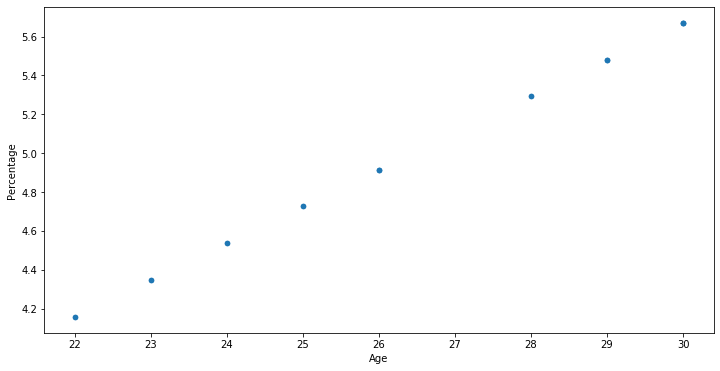

In [18]:
#scatter plot for youngest 20
table_youngest20.plot.scatter(x = 'Age', y = 'Percentage', figsize = (12, 6))


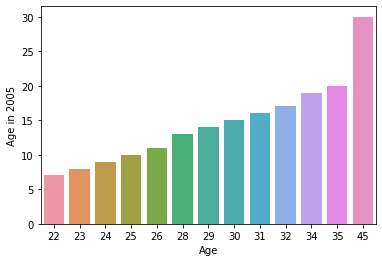

In [19]:
#barplot for celebrants
sns.barplot(x='Age', y='Age in 2005', data=table)

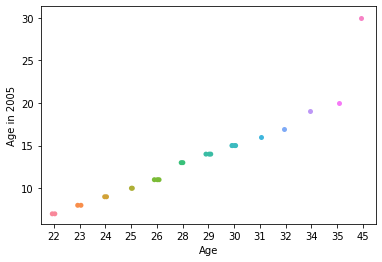

In [20]:
#strip plot for celebrants
sns.stripplot(x="Age", y="Age in 2005", data=table,jitter=True)


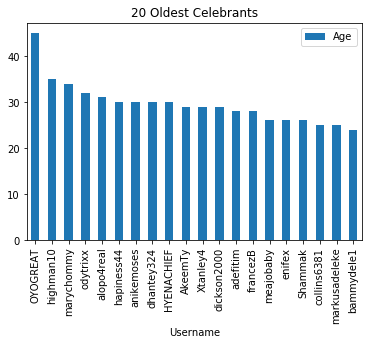

In [21]:
#the oldest 20 members celebrating
table_oldest20 = table.sort_values(by="Age", ascending=False)[:20]

# To display the plot within the Jupyter notebook
get_ipython().run_line_magic('matplotlib', 'inline')

table_oldest20.plot(x="Username", y="Age", kind="bar", title="20 Oldest Celebrants")


In [22]:
# Lets find the sum of the ages
sum_oldest_20 = table_oldest20["Age"].sum()

# Lets find the percentage of each first 15 oldest members and save it in a new column "Percentage"
table_oldest20["Percentage"] = (table_oldest20["Age"] * 100) / (sum_oldest_20)
print(table_oldest20)


         Username  Age        Date  Age Frequency  Age in 2005  \
26       OYOGREAT   45  2020-01-24              8           30   
17      highman10   35  2020-01-24              1           20   
34     marychommy   34  2020-01-24              3           19   
35       odytrixx   32  2020-01-24              2           17   
19     alopo4real   31  2020-01-24              1           16   
23     hapiness44   30  2020-01-24              6           15   
20     anikemoses   30  2020-01-24              5           15   
31     dhantey324   30  2020-01-24              9           15   
27     HYENACHIEF   30  2020-01-24              1           15   
41        AkeemTy   29  2020-01-24              1           14   
32       Xtanley4   29  2020-01-24              5           14   
40    dickson2000   29  2020-01-24              4           14   
28       adefitim   28  2020-01-24              7           13   
45       francezB   28  2020-01-24              1           13   
33      me

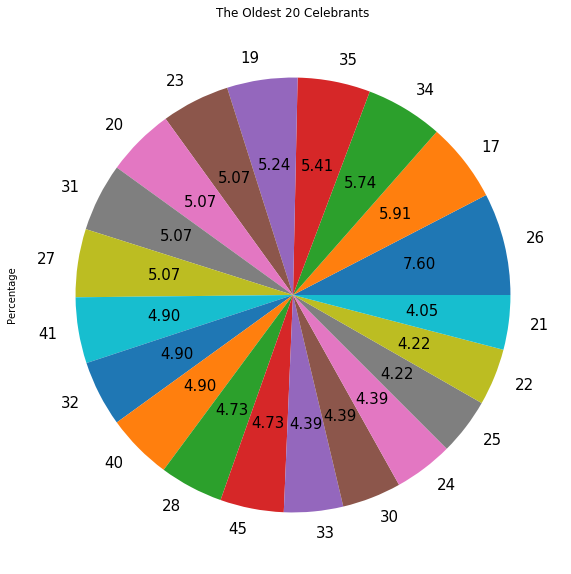

In [23]:
# to plot the pie chat of the Percentage column above
table_oldest20["Percentage"].plot.pie(autopct='%.2f', fontsize=15, figsize=(10, 10), title="The Oldest 20 Celebrants")


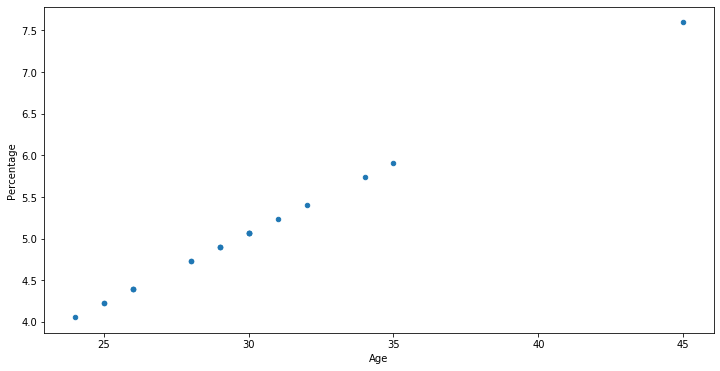

In [24]:
#scatter plot for oldest 20
table_oldest20.plot.scatter(x = 'Age', y = 'Percentage', figsize = (12, 6))

